<a href="https://colab.research.google.com/github/chhak/DeepLearning/blob/master/tf13_auto_encoder_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
날짜 : 2020/08/25
이름 : 김철학
내용 : 딥러닝 오토인코더(AutoEncoder) 개념 실습하기
"""

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

tf.__version__

'2.3.0'

In [ ]:
# MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
# 데이터 전처리
x_train = x_train.reshape(-1, 28 * 28) / 255.0
x_test = x_test.reshape(-1, 28 * 28) / 255.0

x_train.shape

(60000, 784)

In [ ]:
# 오토인코더 모델 구성
inputs = Input(shape=(784,))
hidden = Dense(32, activation='relu')(inputs)
outputs = Dense(784, activation='sigmoid')(hidden)

auto_encoder = Model(inputs, outputs)
auto_encoder.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 1570      
_________________________________________________________________
dense_11 (Dense)             (None, 784)               2352      
Total params: 3,922
Trainable params: 3,922
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 설정/학습하기
auto_encoder.compile(optimizer='adam', loss='binary_crossentropy')
auto_encoder.fit(x_train,
                 x_train, 
                 epochs=10,
                 batch_size=256)

Epoch 1/10
235/235 [==============================] - 3s 11ms/step - loss: 0.2658
Epoch 2/10
235/235 [==============================] - 2s 11ms/step - loss: 0.2482
Epoch 3/10
235/235 [==============================] - 3s 11ms/step - loss: 0.2442
Epoch 4/10
235/235 [==============================] - 3s 11ms/step - loss: 0.2420
Epoch 5/10
235/235 [==============================] - 3s 12ms/step - loss: 0.2404
Epoch 6/10
235/235 [==============================] - 3s 11ms/step - loss: 0.2391
Epoch 7/10
235/235 [==============================] - 2s 10ms/step - loss: 0.2379
Epoch 8/10
235/235 [==============================] - 2s 10ms/step - loss: 0.2369
Epoch 9/10
235/235 [==============================] - 3s 11ms/step - loss: 0.2359
Epoch 10/10
235/235 [==============================] - 3s 12ms/step - loss: 0.2351


In [ ]:
# 예측하기
result = auto_encoder.predict(x_test)
result

array([[7.7074110e-05, 4.0923991e-05, 5.6259705e-05, ..., 1.8938345e-05,
        6.3365762e-05, 2.2682548e-04],
       [3.1198375e-08, 5.4407634e-09, 7.2578395e-08, ..., 2.7362366e-09,
        2.2459478e-08, 1.6601608e-07],
       [1.9898971e-09, 3.2527578e-10, 2.9702814e-09, ..., 1.0692834e-10,
        1.3363182e-09, 1.5954035e-08],
       ...,
       [2.4488467e-10, 3.6749749e-11, 2.8652647e-10, ..., 9.1911088e-12,
        1.5636967e-10, 2.6232896e-09],
       [2.6196596e-09, 4.1654699e-10, 4.4667177e-09, ..., 1.4979668e-10,
        1.7756906e-09, 1.9742432e-08],
       [1.5494230e-09, 1.9686572e-10, 4.2133514e-09, ..., 8.7601072e-11,
        1.0517629e-09, 1.1084982e-08]], dtype=float32)

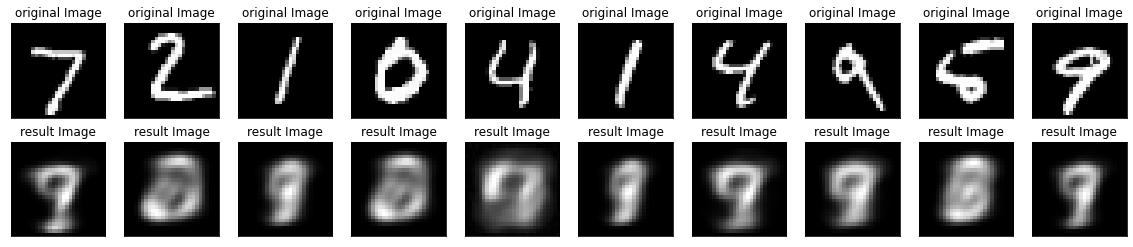

In [ ]:
# 예측값 이미지 출력
plt.figure(figsize=(20, 4))

for i in range(10):
  # original image
  ax = plt.subplot(2, 10, i+1)
  ax.set_title('original Image')
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # result image
  ax = plt.subplot(2, 10, i+11)
  ax.set_title('result Image')
  plt.imshow(result[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)